In [1]:
import pandas
import numpy
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(), 
                        LinearSVC(C=1, random_state = 42))

svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state=42) 

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state = 42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel = 'poly', degree = 3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [7]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel = "rbf", gamma = 5, C = 0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

svc_linear = make_pipeline(StandardScaler(), LinearSVC(loss = 'hinge'))
svc_linear.fit(X, y.values.flatten())
np.mean(cross_val_score(svc_linear, X, y.values.flatten(), cv = 5))

c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9846927670869278

In [10]:
from sklearn.svm import SVC

svc_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svc_classifier.fit(X, y.values.flatten())
np.mean(cross_val_score(svc_classifier, X, y.values.flatten(), cv = 5))

0.9861473125414731

In [11]:
from sklearn.linear_model import SGDClassifier

SGD = make_pipeline(StandardScaler(), SGDClassifier(loss = 'hinge', random_state=42))
SGD.fit(X, y.values.flatten())
np.mean(cross_val_score(SGD, X, y.values.flatten(), cv = 5))

0.9876177836761778

In [12]:
# import matplotlib.pyplot as plt
# scaler = StandardScaler()
# def compute_decision_boundary(model):
#     w = -model.coef_[0, 0] / model.coef_[0, 1]
#     b = -model.intercept_[0] / model.coef_[0, 1]
#     return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

# lin_line = compute_decision_boundary(svc_linear)
# svc_line = compute_decision_boundary(svc_classifier)
# sgd_line = compute_decision_boundary(SGD)

# # Plot all three decision boundaries
# plt.figure(figsize=(11, 4))
# plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
# plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
# plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
# plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
# plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
# plt.xlabel("Petal length")
# plt.ylabel("Petal width")
# plt.legend(loc="upper center")
# plt.axis([0, 5.5, 0, 2])
# plt.grid()

# plt.show()

In [13]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame = True)

X = wine.data
y = wine.target


In [14]:
hyper_C = np.linspace(100,1000,101)
data = []
for i in hyper_C:
    svm_clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', decision_function_shape='ovr', C = i))
    svm_clf.fit(X, y)
    score = np.mean(cross_val_score(svm_clf, X, y, cv = 5))
    data.append([i,score])

In [22]:
svm_clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', decision_function_shape='ovr', C = i))
svm_clf.fit(X, y)
score = np.mean(cross_val_score(svm_clf, X, y, cv = 5))
score

0.9888888888888889

In [15]:
df = pd.DataFrame(data, columns = ["C", 'Score'])

In [16]:
df.sort_values(by = ['C'], ascending = True)['Score'].value_counts()

Score
0.988889    101
Name: count, dtype: int64

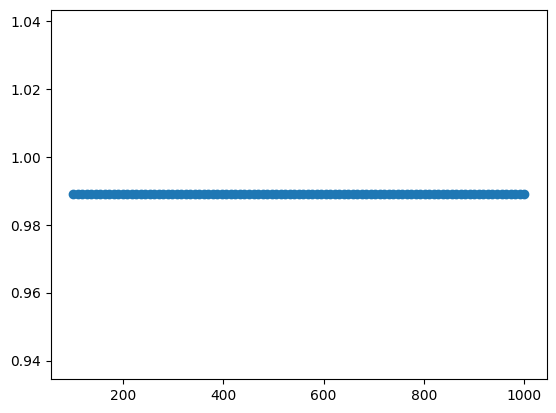

In [17]:
plt.scatter("C",  "Score", data = df)
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform, uniform

svm_c = make_pipeline(StandardScaler(), SVC(random_state=42))

parameters = {
    'svc__kernel' : ('rbf', 'linear'), 
    'svc__C' : np.linspace(1,10,10)
    }
tuning = GridSearchCV(svm_c, parameters)

In [68]:
tuning.fit(X, y.values.flatten())

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'svc__kernel': ('rbf', 'linear')})

In [69]:
tuning.best_params_, tuning.best_score_

({'svc__C': 2.0, 'svc__kernel': 'rbf'}, 0.9888888888888889)

In [70]:
uniform(1,10)